## Model Iterations
#### The goal of this notebook is to take our FSM and scale/transfor the data as well as enginner additional features to improve our R squarred

#### Outline
* Import necessary libraries and datasets
* Look over FSM 

### Import libraries and dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import src.mc_functions as mc
df = mc.create_dataframe()

In [4]:
df

,Major,Minor,SalePrice,PropertyClass,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,TrafficNoise,PowerLines,OtherNuisances,TidelandShoreland,has_porch
0,213043,0120,560000,8,1930,180,0,0,0,0,0,1
1,940652,0630,435000,8,1975,45,0,0,0,0,0,1
2,937630,0695,550000,8,1560,0,0,0,0,0,0,0
3,098400,0450,409950,8,1850,0,0,0,0,0,0,0
4,030200,0645,380000,8,1750,670,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43862,757820,0400,930000,8,2600,0,0,0,0,0,0,0
43863,390497,0150,850000,8,2220,40,0,0,0,0,0,1
43864,246090,0090,686000,8,1910,80,0,2,0,0,0,1
43865,143800,0420,695000,8,2520,350,0,0,0,0,0,1


In [5]:
df.corr()['SalePrice']

SalePrice            1.000000
PropertyClass       -0.050146
SqFtTotLiving        0.195816
SqFtOpenPorch        0.107674
SqFtEnclosedPorch    0.015146
TrafficNoise        -0.019141
PowerLines          -0.007842
OtherNuisances      -0.008572
TidelandShoreland    0.085883
has_porch            0.080662
Name: SalePrice, dtype: float64

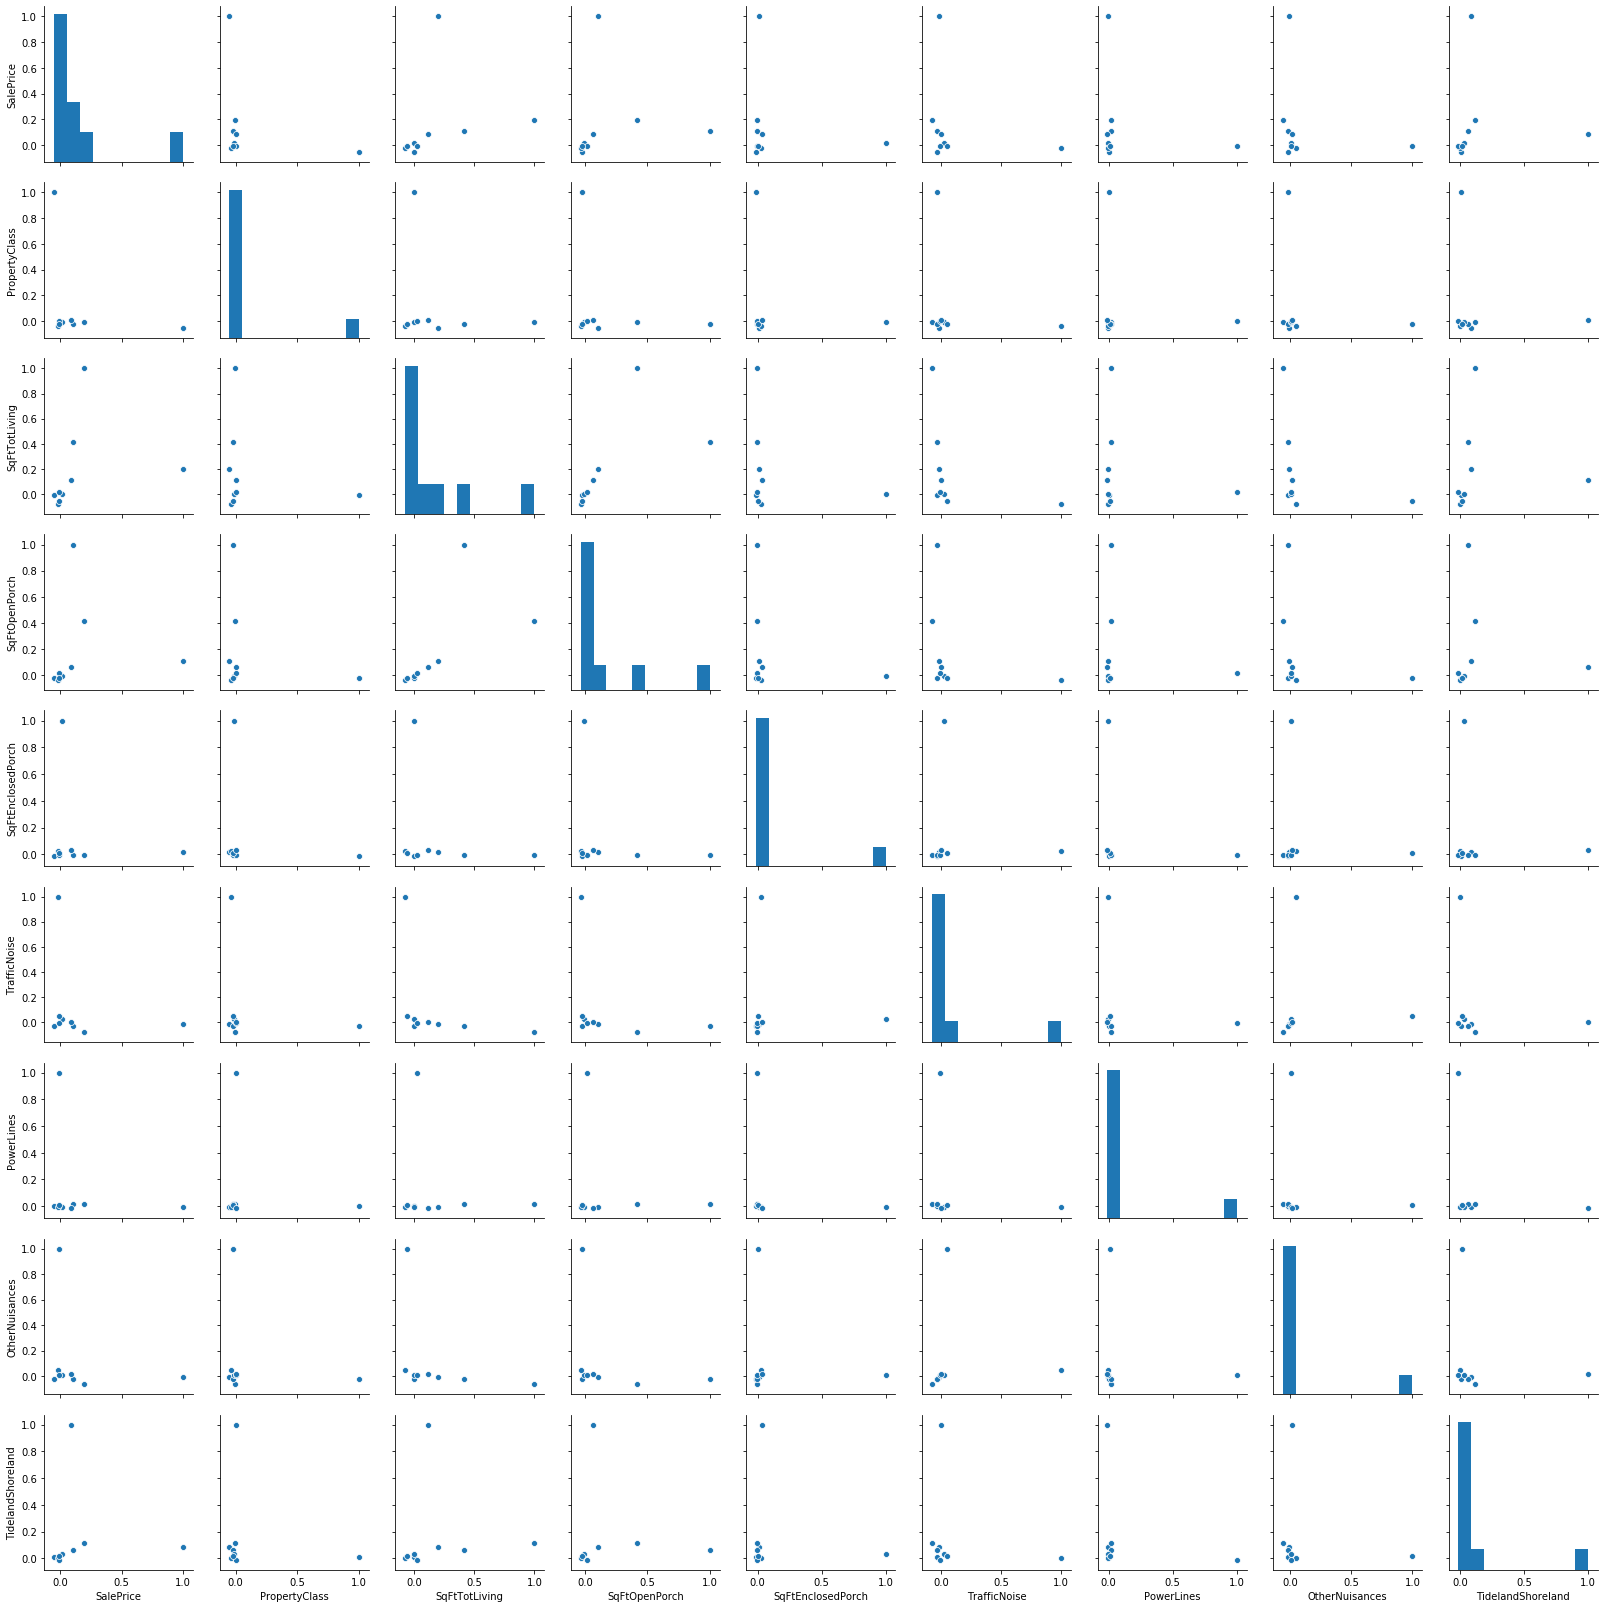

In [6]:
correlation_df = df[['SalePrice', 'PropertyClass', 'SqFtTotLiving', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'TrafficNoise', 'PowerLines', 'OtherNuisances', 'TidelandShoreland']]
sns.pairplot(correlation_df.corr())

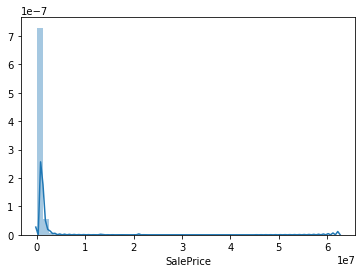

In [7]:
sns.distplot(df['SalePrice'], kde=True)

In [8]:
saleprice = df['SalePrice']
saleprice_scaled = (saleprice - np.mean(saleprice)) / np.std(saleprice)

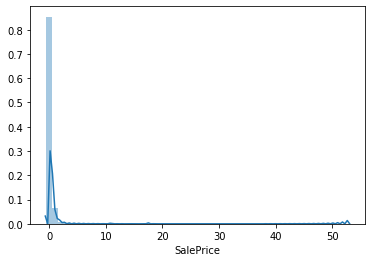

In [9]:
sns.distplot(saleprice_scaled)

In [12]:
df['SalePrice'].value_counts()

0          13904
450000       231
650000       228
700000       207
400000       204
           ...  
914950         1
995112         1
108108         1
18000          1
1460215        1
Name: SalePrice, Length: 5556, dtype: int64

In [13]:
df = df[df['SalePrice'] > 0]

In [14]:
log_saleprice = np.log(df['SalePrice'])
log_saleprice

0        13.235692
1        12.983101
2        13.217674
3        12.923790
4        12.847927
           ...    
43862    13.742940
43863    13.652992
43864    13.438633
43865    13.451667
43866    14.253765
Name: SalePrice, Length: 29961, dtype: float64

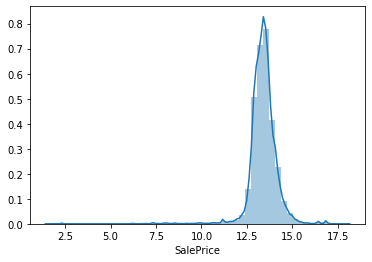

In [15]:
sns.distplot(log_saleprice)

In [16]:
list(df.columns)

['Major',
 'Minor',
 'SalePrice',
 'PropertyClass',
 'SqFtTotLiving',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'TrafficNoise',
 'PowerLines',
 'OtherNuisances',
 'TidelandShoreland',
 'has_porch']

In [18]:
continuous = ['SqFtTotLiving', 'SqFtOpenPorch', 'SqFtEnclosedPorch']
categoricals = ['PropertyClass', 'TrafficNoise', 'PowerLines', 'OtherNuisances', 'TidelandShoreland', 'has_porch']

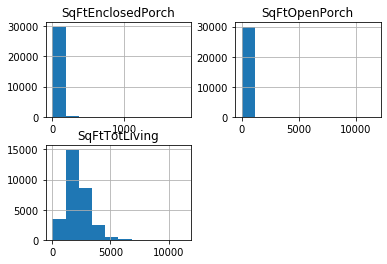

In [19]:
df[continuous].hist();

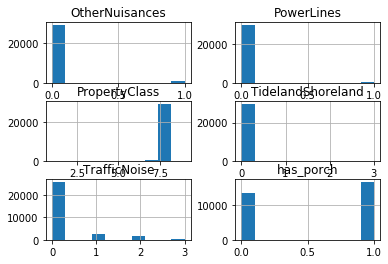

In [20]:
df[categoricals].hist();

In [21]:
df_target = df['SalePrice']
df_target_log = np.log(df['SalePrice'])

In [32]:
df.corr()['SalePrice']

SalePrice            1.000000
PropertyClass       -0.065172
SqFtTotLiving        0.245807
SqFtOpenPorch        0.124655
SqFtEnclosedPorch    0.023313
TrafficNoise        -0.010747
PowerLines          -0.010140
OtherNuisances      -0.007705
TidelandShoreland    0.149521
has_porch            0.084885
Name: SalePrice, dtype: float64

In [93]:
df['SalePrice'].min(), df['SalePrice'].max()

(5, 62500000)

In [35]:
df['ScaledSalePrice'] = np.log(df['SalePrice'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df.corr()['ScaledSalePrice'].sort_values(ascending=False)

ScaledSalePrice      1.000000
SalePrice            0.552790
SqFtTotLiving        0.427729
SqFtOpenPorch        0.187435
has_porch            0.153227
TidelandShoreland    0.077633
PropertyClass        0.010747
OtherNuisances      -0.000415
SqFtEnclosedPorch   -0.001892
PowerLines          -0.014281
TrafficNoise        -0.073182
Name: ScaledSalePrice, dtype: float64

In [162]:
continuous = ['SqFtTotLiving', 'SqFtOpenPorch', 'SqFtEnclosedPorch']
categoricals = ['PropertyClass', 'TrafficNoise', 'PowerLines', 'OtherNuisances', 'TidelandShoreland', 'has_porch']

In [51]:
under_1k = [True if x < 40000 else False for x in df['SalePrice']]
print(len(df[under_1k].values))

223


In [53]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
ohe = OneHotEncoder(drop='first')
trans = ohe.fit_transform(df[categoricals])

In [91]:
trans.todense()

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [92]:
ohe.get_feature_names()

array(['x0_2', 'x0_3', 'x0_7', 'x0_8', 'x0_9', 'x1_1', 'x1_2', 'x1_3',
       'x2_1', 'x3_1', 'x4_1', 'x4_2', 'x4_3', 'x5_1'], dtype=object)

In [84]:
df1 = pd.DataFrame(trans.todense(), columns=ohe.get_feature_names())
df1.head()

,x0_000120,x0_000140,x0_000200,x0_000300,x0_000360,x0_000520,x0_000660,x0_000680,x0_000720,x0_000760,...,x11_16.472267464678932,x11_16.551500127755727,x11_16.588099280204055,x11_16.591219407540297,x11_16.66361251451424,x11_16.85933751580238,x11_17.216707939626428,x11_17.255928652779712,x11_17.43985149094064,x11_17.95067711470663
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
